First thing we want to do is look at the number and type of images we have, as well as their sizes

In [45]:
#Load the packages needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import random

In [3]:
print(os.getcwd())

C:\Users\Alfredo\Documents\GitHub\Capstone3\Notebooks


In [4]:
seed = 180
pos_dir = '../data/pos'
neg_dir = '../data/neg'

We will first iterate over all the images saved in the positive tagged folder. We plan on documenting the size of the image as well as the extension type and name for further analysis:

In [8]:
def img_data(im_dir):
    
    #first we are going to iterate over all the images
    W=[]
    H=[]
    D=[]
    type_count = []
    names = []
    #we first iterate over all the images
    for images in os.listdir(im_dir):
        #identify the type of image as well as the dimensions
        d_type = images.split('.')[-1]
        path = im_dir + '/'+images
        image = imread(path)
        try: 
            w, h, d = image.shape
        except:
            #ignore and print error images that have more than 3 dimensions
            print(images)
        W.append(w)
        H.append(h)
        D.append(d)
        type_count.append(d_type)
        names.append(images)
    #create a dataframe with the information for the images
    return pd.DataFrame({'W' :W, 'H':H, 'D':D, 'type':type_count, 'name' : names})

In [9]:
pos  = img_data(pos_dir)

In [10]:
pos.head()

,W,H,D,type,name
0,267,400,3,jpg,02750f88-3780-436b-8aec-9051593c25ba.jpg
1,288,400,3,jpg,0498c861-fc5b-4ed1-8af3-4638274a68dd.jpg
2,294,400,3,jpg,0780f7fb-1003-401f-8d53-6df61c68715b.jpg
3,292,400,3,jpg,095fefa7-cabe-42c7-baa9-cc281e24bad2.jpg
4,400,241,3,jpg,09671bbb-547d-42b3-a843-ff001371acbb.jpg


In [11]:
pos.describe()

,W,H,D
count,161.000000,161.000000,161.000000
mean,806.385093,807.826087,3.006211
std,898.784882,694.899980,0.078811
min,159.000000,241.000000,3.000000
25%,311.000000,400.000000,3.000000
50%,534.000000,626.000000,3.000000
75%,1000.000000,866.000000,3.000000
max,6000.000000,4000.000000,4.000000


It looks like we have a total of 161 positive tagged images with the size ranging from 160 pixels in width to 6000 and 240 in height up to 4000. it looks like all images are in color.
Next we will repeat this analysis for the negative tagged images:

In [12]:
neg  = img_data(neg_dir)

In [13]:
neg.head()

,W,H,D,type,name
0,400,263,3,jpg,0080ec4e-b1f9-44b3-94cc-29a90e67b151.jpg
1,400,267,3,jpg,01130d1d-3074-4403-b21a-a1f17cc4a5bf.jpg
2,225,400,3,jpg,052b64de-d694-4fe4-9079-7cc1ccdc394d.jpg
3,400,267,3,JPG,079fa843-2184-4d34-94db-e15baa76ad03.JPG
4,400,400,3,jpeg,0b108021-4be9-46ae-9781-eeb348fb1d69.jpeg


In [14]:
neg.describe()

,W,H,D
count,194.000000,194.000000,194.000000
mean,664.247423,732.139175,3.020619
std,924.882488,930.538830,0.142471
min,200.000000,200.000000,3.000000
25%,360.000000,320.000000,3.000000
50%,400.000000,400.000000,3.000000
75%,476.250000,626.000000,3.000000
max,6000.000000,6000.000000,4.000000


It looks like we have 194 negative tagged images with width ranging from 200 to 6000 pixels and height ranging from 200 to 6000. Just like with the positive images, all of the negative images are coloured. lets see how the dimensions range:

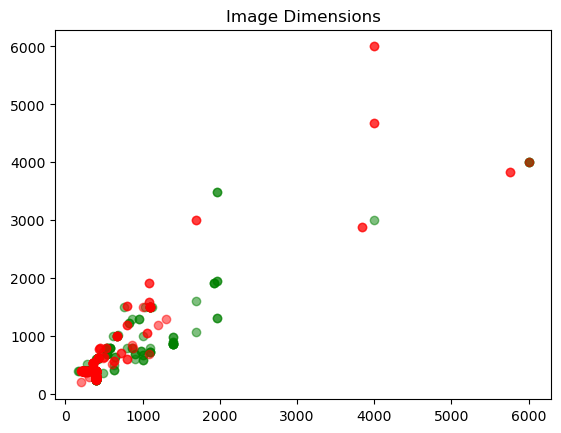

In [15]:
#plottinh the sizes of the positive and negative iamges using green for the positive and red for the negative images
plt.scatter(pos.W, pos.H, color = 'green', alpha = 0.5)
plt.scatter(neg.W, neg.H, color = 'red', alpha = 0.5)
plt.title('Image Dimensions')
plt.show()

Most of the images seem to be under the 1500X2000 pixels with few larger than those dimensions. Lest take a look at the smallest and largest both positive and negative images:

In [66]:
#find the smallest and biggest positive images
(pos.H*pos.W).sort_values()

23        63600
59        68000
41        84000
53        88800
27        90000
         ...   
74      6828640
134    11986004
156    24000000
67     24000000
131    24000000
Length: 161, dtype: int64

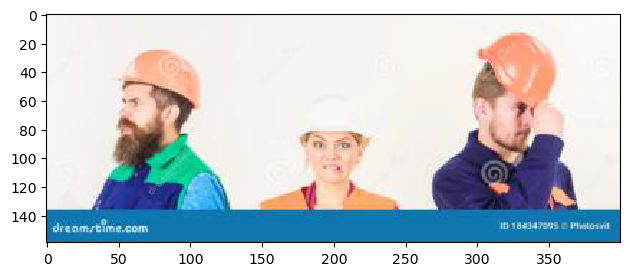

In [67]:
#show the smallest positive image:
image = imread(pos_dir + '/'+pos.iloc[23,4])
imshow(image)

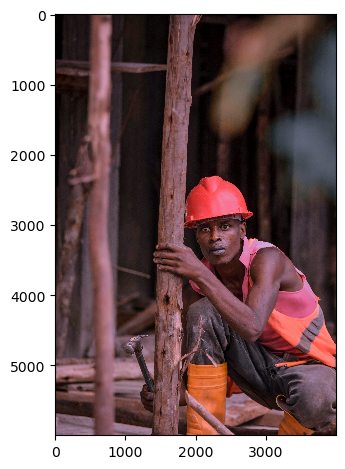

In [68]:
#show the largest positive image:
image = imread(pos_dir + '/'+pos.iloc[131,4])
imshow(image)

In [69]:
#find the smallest and biggest negative images
(neg.H*neg.W).sort_values()

155       40000
25        80000
94        80000
57        83600
73        84000
         ...   
163    22118400
157    22118400
138    24000000
168    24000000
164    24000000
Length: 194, dtype: int64

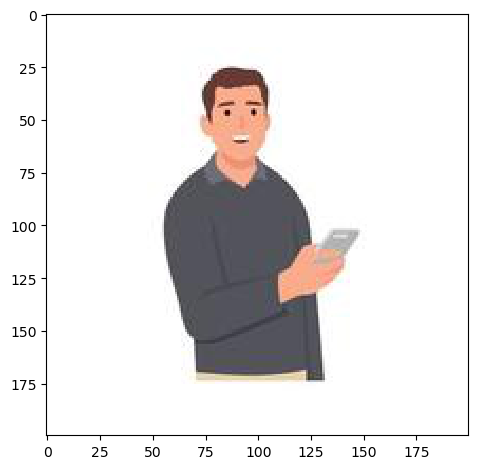

In [70]:
#show the smallest positive image:
image = imread(neg_dir + '/'+neg.iloc[155,4])
imshow(image)

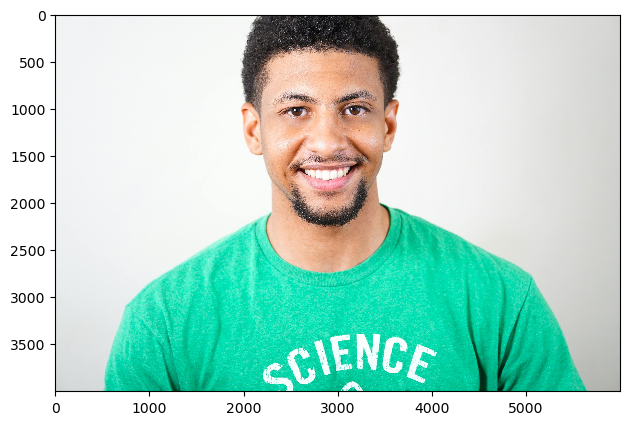

In [71]:
#show the smallest positive image:
image = imread(neg_dir + '/'+neg.iloc[164,4])
imshow(image)

It looks like both positive and negative images range in size and the size is not necessary for identifying safety geat. 
<br>Next we will take a look a the type of images (image extension types):

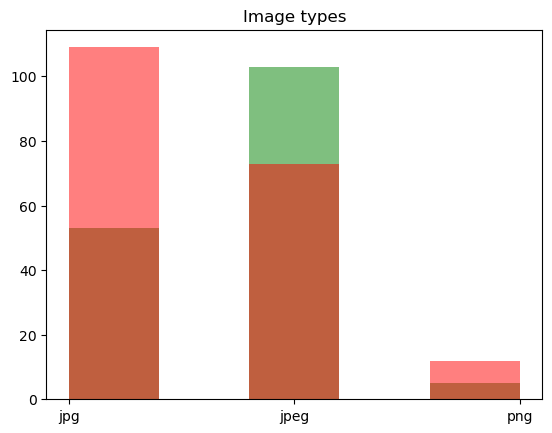

In [17]:
#we are plotting the count of types of types for both positive and negative images:
plt.hist(pos.type.str.lower(), color='green', alpha = 0.5, bins = 5)
plt.hist(neg.type.str.lower(), color='red', alpha = 0.5, bins =5)
plt.title('Image types')
plt.show()

It looks like most of the images are jpg and jpeg with just a few png.
The next step in our analysis will be to analyse the color composition of the positive and negative images. to do this, we will first write a funciton to plot a color histogram for a given image:

In [51]:
#used to plot a color histogram of a given image. offers the possibility to cap the occurance
def im_histogram(image, top = 256):
    #find the color histogram of each channel (R, G, B)
    r = image[:,:,0].ravel()
    g = image[:,:,1].ravel()
    b = image[:,:,2].ravel()
    print(f"Color Red, average = {r.mean():.2f} std = {r.std():.2f}")
    print(f"Color Green, average = {g.mean():.2f} std = {g.std():.2f}")
    print(f"Color Blue, average = {b.mean():.2f} std = {b.std():.2f}")
    fig, (ax1, ax2) = plt.subplots(2)
    #overlay the 3 color channels in a histogram
    ax1.hist(r[r<top], bins = top, color = 'r', alpha = 0.5)
    ax1.hist(g[g<top], bins = top, color = 'g', alpha = 0.5)
    ax1.hist(b[b<top], bins = top, color = 'b', alpha = 0.5)
    ax1.set(title="Histogram color frequency for image")
    #show the immage on the second axis
    ax2 = imshow(image)
    plt.show()

In [20]:
image = imread(pos_dir + '/'+pos.iloc[2, 4])

Color Red, average = 132.18 std = 70.37
Color Green, average = 114.35 std = 60.52
Color Blue, average = 106.82 std = 61.83


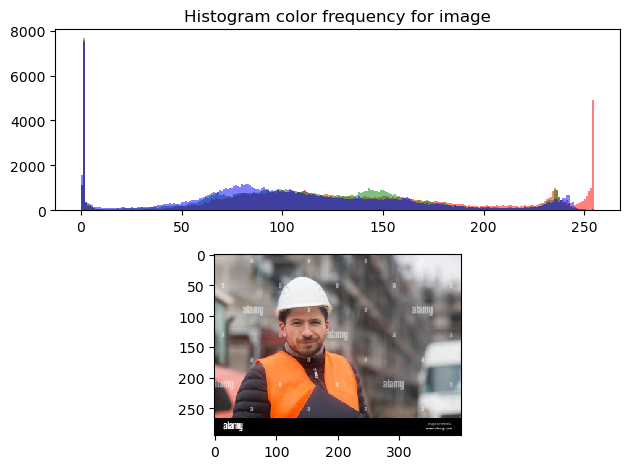

In [38]:
im_histogram(image)

With this function we can now both see the image and the RGB color composition. We can use this analysis to evaluate 3 random positive and negative images:

Color Red, average = 119.24 std = 51.61
Color Green, average = 105.87 std = 50.42
Color Blue, average = 95.10 std = 52.84


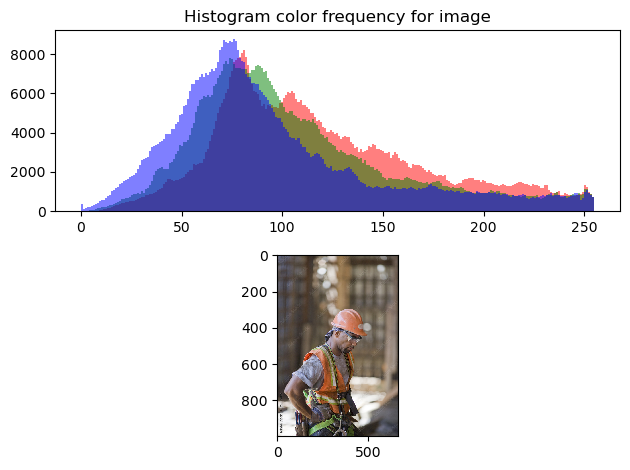

In [42]:
#test the histogram review for a random positive image
im_histogram(imread(pos_dir + '/'+pos.iloc[random.randrange(1,161), 4]))

Color Red, average = 195.30 std = 61.82
Color Green, average = 193.40 std = 61.52
Color Blue, average = 169.66 std = 72.38


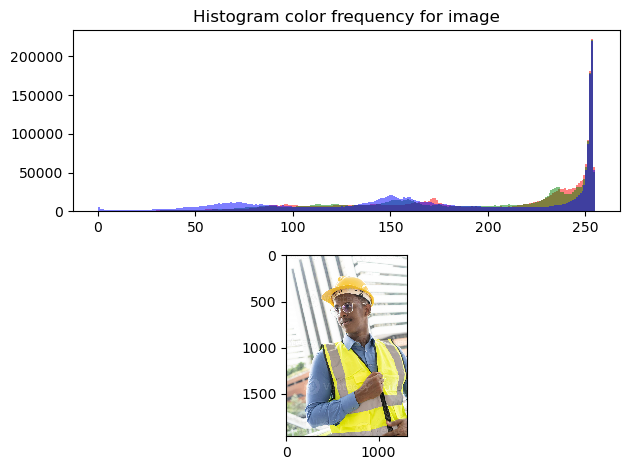

In [43]:
#test the histogram review for a random positive image
im_histogram(imread(pos_dir + '/'+pos.iloc[random.randrange(1,161), 4]))

Color Red, average = 216.60 std = 67.70
Color Green, average = 200.75 std = 79.87
Color Blue, average = 177.58 std = 101.13


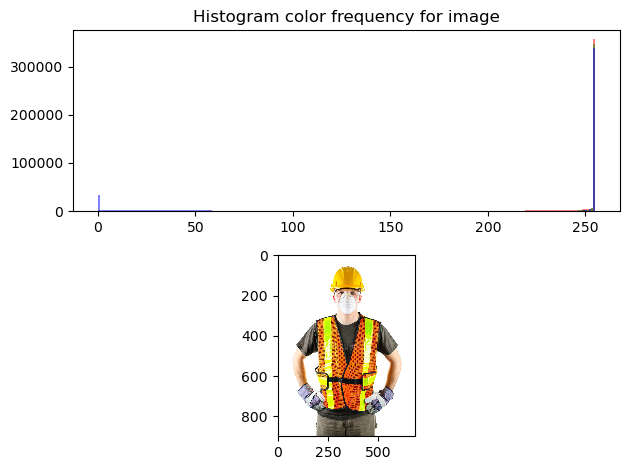

In [44]:
#test the histogram review for a random positive image
im_histogram(imread(pos_dir + '/'+pos.iloc[random.randrange(1,161), 4]))

Color Red, average = 100.71 std = 76.03
Color Green, average = 90.00 std = 61.40
Color Blue, average = 74.49 std = 56.36


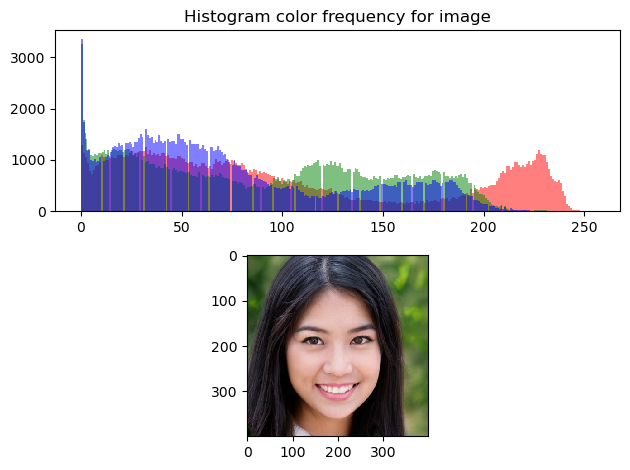

In [48]:
#test the histogram review for a random neg image
im_histogram(imread(neg_dir + '/'+neg.iloc[random.randrange(1,194), 4]))

Color Red, average = 129.69 std = 42.04
Color Green, average = 145.55 std = 29.08
Color Blue, average = 132.49 std = 39.21


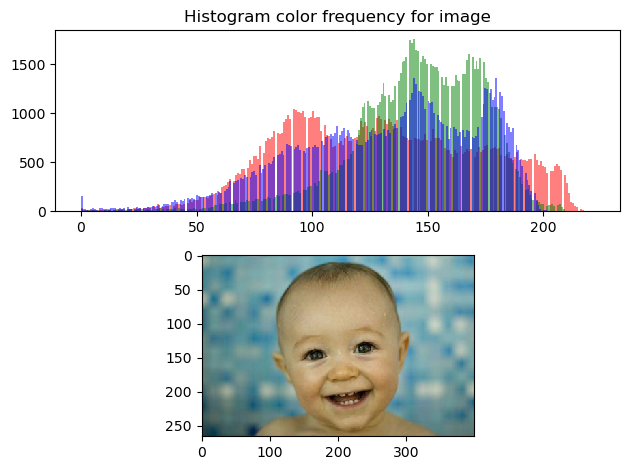

In [49]:
#test the histogram review for a random neg image
im_histogram(imread(neg_dir + '/'+neg.iloc[random.randrange(1,194), 4]))

Color Red, average = 127.58 std = 77.69
Color Green, average = 106.55 std = 76.11
Color Blue, average = 107.33 std = 76.29


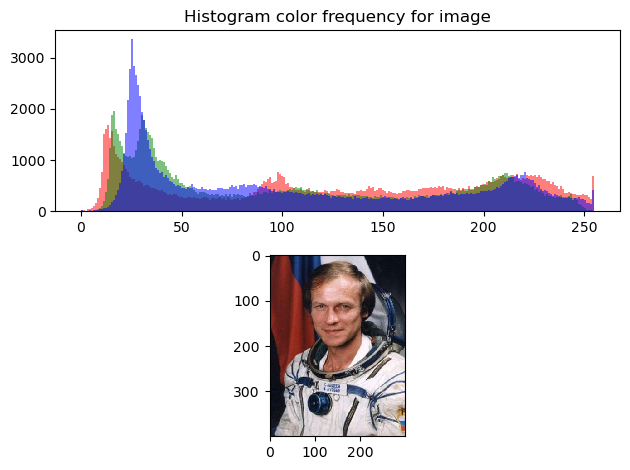

In [50]:
#test the histogram review for a random neg image
im_histogram(imread(neg_dir + '/'+neg.iloc[random.randrange(1,194), 4]))

As we can see from the analysis, there is a pretty big spike on the colours of the safety gear (close to 8K count) wether is yellow or red or a mix of all 3. While images that are not wearing safety gear seem to have lower counts and a more diverse range of counts for all colours. <br>
One interesting analysis we could do, would be seeing the effect on the analysis if we increase contrast:

Color Red, average = 132.18 std = 70.37
Color Green, average = 114.35 std = 60.52
Color Blue, average = 106.82 std = 61.83


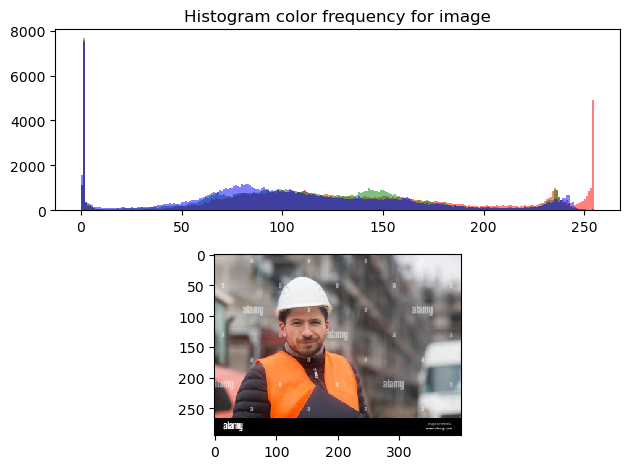

In [75]:
image = imread(pos_dir + '/'+pos.iloc[2, 4])
im_histogram(image)

Color Red, average = 87.90 std = 77.46
Color Green, average = 65.61 std = 58.47
Color Blue, average = 59.72 std = 60.22


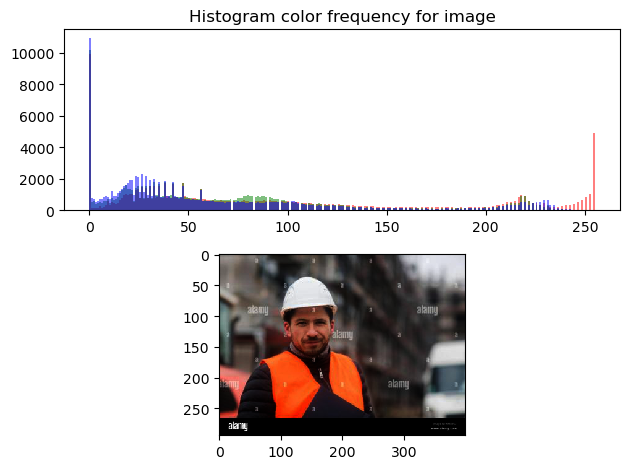

In [80]:
from skimage import exposure
increased_contrast = exposure.adjust_gamma(image, 2)
im_histogram(increased_contrast)

Color Red, average = 53.88 std = 78.03
Color Green, average = 30.34 std = 49.77
Color Blue, average = 28.24 std = 51.96


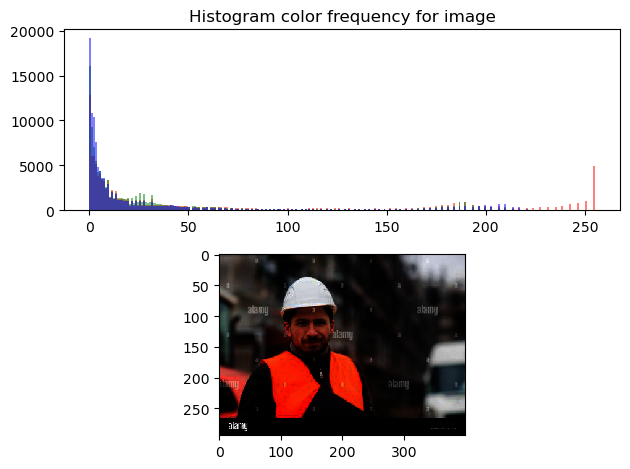

In [81]:
increased_contrast = exposure.adjust_gamma(image, 4)
im_histogram(increased_contrast)

Color Red, average = 41.41 std = 75.14
Color Green, average = 18.57 std = 42.36
Color Blue, average = 18.23 std = 44.98


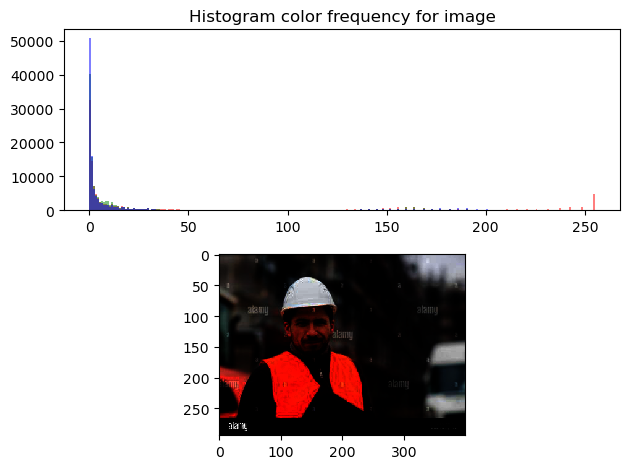

In [82]:
increased_contrast = exposure.adjust_gamma(image, 6)
im_histogram(increased_contrast)

It looks like by increasing the contrast we can get rid of a lot of the details we dont want to see and keep only the safety gear (hat and vest). lets compare the results with a non safety image:

Color Red, average = 182.22 std = 80.96
Color Green, average = 172.75 std = 83.78
Color Blue, average = 171.15 std = 85.96


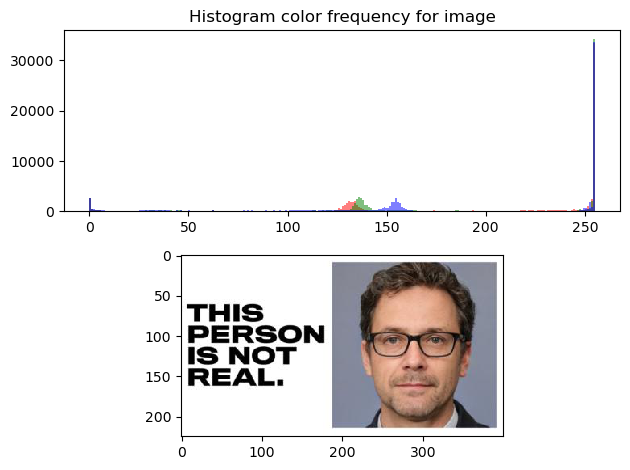

In [83]:
image = imread(neg_dir + '/'+neg.iloc[2, 4])
im_histogram(image)

Color Red, average = 155.87 std = 98.90
Color Green, average = 144.56 std = 102.30
Color Blue, average = 143.83 std = 103.17


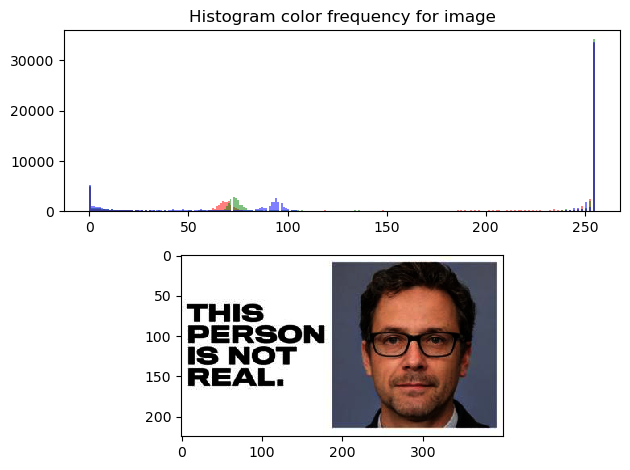

In [84]:
increased_contrast = exposure.adjust_gamma(image, 2)
im_histogram(increased_contrast)

Color Red, average = 133.66 std = 113.02
Color Green, average = 123.01 std = 117.16
Color Blue, average = 122.92 std = 116.93


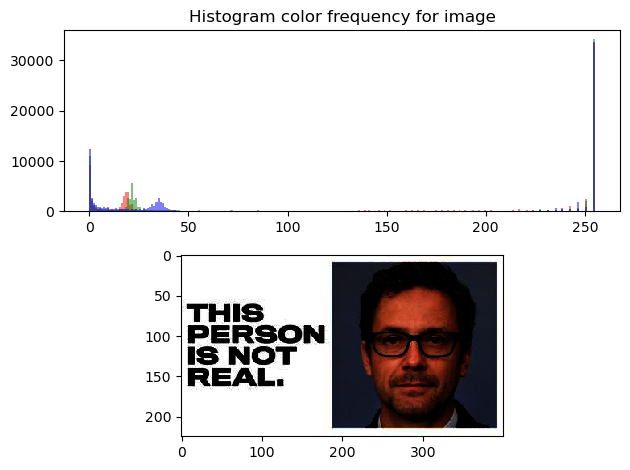

In [85]:
increased_contrast = exposure.adjust_gamma(image, 4)
im_histogram(increased_contrast)

Color Red, average = 124.75 std = 117.60
Color Green, average = 115.98 std = 121.80
Color Blue, average = 115.77 std = 121.52


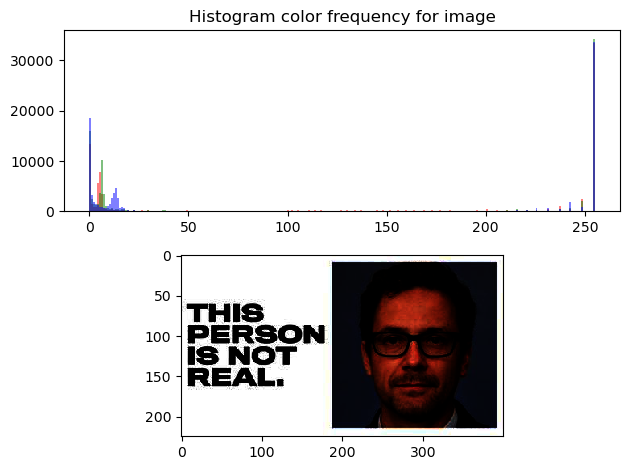

In [86]:
increased_contrast = exposure.adjust_gamma(image, 6)
im_histogram(increased_contrast)

The resulting analysis shows we can get rid of a lot of the noise on the image but the spikes we are seeing on images wearing safety gear are not repeating here. This higher contrast transformation could be very helpful when training our Convolutional Neural Network